<a href="https://colab.research.google.com/github/audreyemmely/pln/blob/main/pln_lista4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resolução Lista 4**

---

Audrey Emmely Rodrigues Vasconcelos

Karen Nayara Gomes da Silva

In [1]:
# from google.colab import files
# uploaded = files.upload()
# upando train_data e test_data_solution

In [2]:
#!pip install yellowbrick

In [3]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF, PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [5]:
df = pd.read_csv('train_data.txt', sep =':::', header = None, engine = 'python', nrows = 2000)
df.columns = ['id', 'title', 'genre', 'description']
df2 = pd.read_csv('test_data_solution.txt', sep =':::', header = None, engine = 'python', nrows = 2000)
df2.columns = ['id', 'title', 'genre', 'description']

In [6]:
dataset = pd.concat([df, df2], ignore_index=True)
dataset.drop(['id','genre'], axis=1, inplace=True)

In [7]:
def preprocess(description):
  description = re.sub(r'\w*\d\w*', '', description) #remove todas as palavras que contêm números
  description = re.sub(r'[^a-zA-Z ]', '', description.lower())
  return re.sub(r'\s+', ' ', description) #retira espaços repetidos

In [8]:
dataset['processed_description'] = dataset.description.apply(preprocess)

In [9]:
stop_words = set(nltk.corpus.stopwords.words('english'))
def remove_stopwords(description):
    tokenized_text = nltk.word_tokenize(description, language='english')
    return " ".join([token for token in tokenized_text if token not in stop_words])

In [10]:
dataset['processed_description'] = dataset.processed_description.apply(remove_stopwords)

In [11]:
dataset

,title,description,processed_description
0,Oscar et la dame rose (2009),Listening in to a conversation between his do...,listening conversation doctor parents yearold ...
1,Cupid (1997),A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,The Secret Sin (1915),To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...
...,...,...,...
3995,L'absence (2009/II),"Adama Diop is a successful scientist, living ...",adama diop successful scientist living paris y...
3996,Blood Circus (2017),"Sean ""THE KILLIN'"" Dillon was on top of the w...",sean killin dillon top world become decorated ...
3997,Gangsta Brown Master of the Game (2016),This DVD consists of 22 fictional characters ...,dvd consists fictional characters including mr...
3998,Treasure of the Golden Condor (1953),Jean-Paul rebels against his bondage to his u...,jeanpaul rebels bondage uncle marquis de st ma...


## Questão 1

Realize um comparativo entre os métodos LDA, SVD e NMF para realizar
modelagem de tópicos. Para cada método:

a) empiricamente, tente identificar uma quantidade de tópicos adequada para
seu problema. Exiba resultados que justifiquem a quantidade de tópicos
escolhida;

b) identifique as 5 palavras mais relevantes de cada tópico;

c) identifique os 3 tópicos mais relevantes de 5 documentos quaisquer (você
pode representar os tópicos por suas 5 palavras mais relevantes).

d) qual método apresentou melhores resultados, na sua opinião? Justifique com resultados/dados.

In [12]:
n_topics = 5
samples = dataset.sample(n=5)
samples.reset_index(inplace=True)
samples

,index,title,description,processed_description
0,3683,Silly Scaries (2011),Prepare yourself to be scared silly! Three in...,prepare scared silly three independent masters...
1,3493,Joy (2010/I),Joy is an emotionally damaged young woman of ...,joy emotionally damaged young woman eighteen g...
2,2652,WWE No Way Out (2007),Chris Benoit and The Hardyz vs MVP and MNM. M...,chris benoit hardyz vs mvp mnm mr kennedy vs b...
3,3187,Bare Exposure (1993),When Clancy (Westley Scott) has a major probl...,clancy westley scott major problem mob cant pa...
4,3823,Baby's Bath (1899/I),"""In this picture the figures are very large a...",picture figures large clear photographically y...


Utilizando TF-IDF como embbeding dos textos

In [13]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(dataset.processed_description)

In [14]:
for decomposition_algorithm in (LatentDirichletAllocation, TruncatedSVD, NMF):
    algorithm = decomposition_algorithm(n_components=n_topics)
    X_topics = algorithm.fit_transform(X)

    def get_top_words(topic, n, words, algorithm):
      sorted_idxs = np.argsort(algorithm.components_[topic])
      top_words = [words[i] for i in sorted_idxs]
      return [w for w in reversed(top_words[-n:])]

    print(f'Algoritmo: {decomposition_algorithm.__name__}')
    for i in range(n_topics):
        print(f'Tópico {i} -> {get_top_words(i, 5, tfidf.get_feature_names(), algorithm)}')
    print('\n')

    sample_topics = algorithm.transform(tfidf.transform(samples.processed_description))

    for i, sample in samples.iterrows():
        print(f'{sample.title}')
        print(sample.description[:70] + '...')
        print(sample_topics[i])
        print('\n')

Algoritmo: LatentDirichletAllocation
Tópico 0 -> ['life', 'new', 'film', 'one', 'two']
Tópico 1 -> ['life', 'young', 'one', 'love', 'story']
Tópico 2 -> ['life', 'one', 'new', 'film', 'story']
Tópico 3 -> ['film', 'life', 'one', 'world', 'young']
Tópico 4 -> ['life', 'film', 'one', 'new', 'young']


 Silly Scaries (2011) 
 Prepare yourself to be scared silly! Three independent masters of hor...
[0.01905113 0.01908443 0.01937092 0.01902102 0.92347251]


 Joy (2010/I) 
 Joy is an emotionally damaged young woman of eighteen, who was given ...
[0.01937462 0.0195043  0.01954337 0.01992469 0.92165302]


 WWE No Way Out (2007) 
 Chris Benoit and The Hardyz vs MVP and MNM. Mr Kennedy vs Bobby Lashl...
[0.03693995 0.03665142 0.85422585 0.03588301 0.03629977]


 Bare Exposure (1993) 
 When Clancy (Westley Scott) has a major problem with the mob because ...
[0.02909773 0.02882357 0.02908372 0.883959   0.02903599]


 Baby's Bath (1899/I) 
 "In this picture the figures are very large and very clear

Melhor algoritmo: NMF


## Questão 2
Realize um agrupamento dos dados seguindo os seguintes passos:

a) Aplique o algoritmo PCA, preservando 95% da variância nos dados. Qual a
dimensão resultante dos dados projetados?

b) Aplique um algoritmo k-means nos dados projetados, usando o método elbow
para encontrar o valor de k ótimo.

c) Finalmente, aplique um algoritmo k-means nos dados originais (sem projeção
por PCA), usando o método elbow para encontrar o valor de k ótimo.

In [15]:
stemmer = nltk.stem.RSLPStemmer()
dataset['stemmed_text'] = dataset.processed_description.apply(lambda tokens: ' '.join([stemmer.stem(token) for token in tokens.split(' ')]))
X = tfidf.fit_transform(dataset.stemmed_text)

In [16]:
Xproj = PCA(n_components=.95).fit_transform(X.toarray())

In [17]:
Xproj.shape[1]

3311

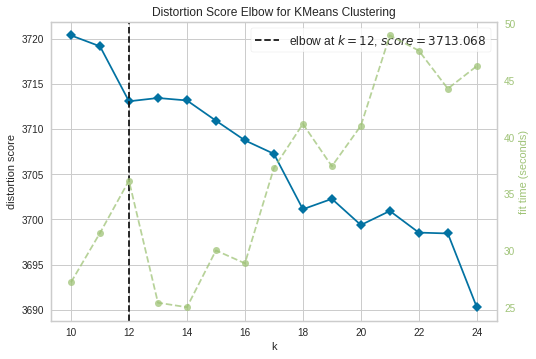

In [18]:
visualizer = KElbowVisualizer(KMeans(), k=(10, 25), metric='distortion')
visualizer.fit(Xproj)
visualizer.show()

In [19]:
k = 12
kmeans = KMeans(n_clusters=k).fit(Xproj)

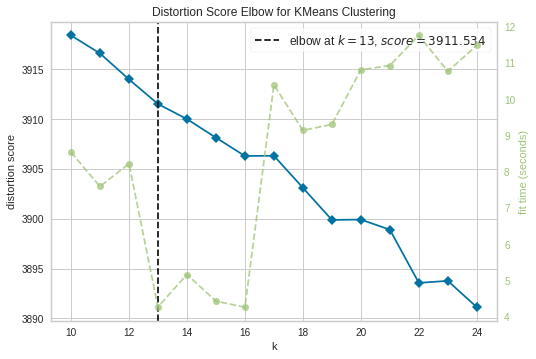

In [20]:
visualizer = KElbowVisualizer(KMeans(), k=(10, 25), metric='distortion')
visualizer.fit(X)
visualizer.show()

In [21]:
k = 13
kmeans = KMeans(n_clusters=k).fit(X)

## Questão 3
Nesta questão você deve aplicar métodos de projeção multidimensional para visualizar os dados da segunda questão no espaço visual.

a) aplique os métodos de projeção multidimensional t-SNE e UMAP nos dados resultantes da questão 2b, e plote os gráficos das projeções resultantes, codificando as cores dos pontos de acordo com os grupos obtidos pelo k-means.

b) compare o tempo de execução e a qualidade visual da projeção dos 2 métodos
de projeção multidimensional, no resultado da questão 2b.

c) usando o método de projeção multidimensional que gerou melhores resultados no item anterior, calcule a projeção nos resultados da questão 2c e compare visualmente os resultados da questão 2b e 2c. Qual abordagem
funcionou melhor?

**Referências**

